<a href="https://colab.research.google.com/github/mscholl96/mad-recime/blob/documentation-stuff/data/recipe1M/dataset-analysis/recipe1M.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [Recipe1M](http://im2recipe.csail.mit.edu) data set analysis
Analysis of dataset should contain: 
* [Plantuml](https://plantuml.com/de/json) diagram of json structure 
* Amount of recipes
* Plots:
 * Num of Instructions
 * Num of Ingredients
 * Most used words in Instructions
 * Most used words in Ingedients
 * (Optional) Kind of dish

In [5]:
import json
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams.update({'font.size': 13})
import re

import count

In [3]:
FILE_DIR = '/content/drive/My Drive/Datasets/Recipe1M/'
# Add GDrive
from google.colab import drive
import sys
drive.mount('/content/drive/')
sys.path.append(FILE_DIR)

Mounted at /content/drive/


In [4]:
# Load data:
# Underlying type: list
# -- Recipe : dict
# --- ingredients : list
# ---- ingredient : dict (size 1: 'text': 'ingredient string')
# --- instructions : list
# ---- instruction : dict (size 1: 'text': 'instruction string')
# --- url : str
# --- id : str
# --- title : str
# --- partition : str

data = json.load(open(f'{FILE_DIR}layer1.json'))
num_recipes = len(data)
print(f'Total number of recipes: {num_recipes}')


Total number of recipes: 1029720


In [6]:
words_in_ingredients = {}
words_in_instructions = {}

nouns_in_ingredients = {}

ingredients_per_recipe = {}
instructions_per_recipe = {}

recipe_websites = {}

total_ingredients = 0
total_instructions = 0

for recipe in data:
    ingredients = recipe['ingredients']
    instructions = recipe['instructions']
    website = recipe['url'].split("/")[2]
    num_ingredients = len(ingredients)
    num_instructions = len(instructions)
    total_ingredients += len(ingredients)
    total_instructions += len(instructions)
    words_in_ingredients = count.countWords(ingredients, words_in_ingredients)
    words_in_instructions = count.countWords(instructions, words_in_instructions)

    ingredients_per_recipe[num_ingredients] = ingredients_per_recipe.setdefault(num_ingredients, 0) + 1
    instructions_per_recipe[num_instructions] = instructions_per_recipe.setdefault(num_instructions, 0) + 1
    recipe_websites[website] = recipe_websites.setdefault(website, 0) + 1

    #nouns_in_ingredients = count.countNouns(ingredients, nouns_in_ingredients)


print(f'Total number of ingredients: {total_ingredients}')
print(f'Total number of instructions: {total_instructions}')
print(f'Number of different words in ingredients: {len(words_in_ingredients)}')
print(f'Number of numeric expressions in ingredients: {words_in_ingredients["numeric"]}')
print(f'Number of different words in instructions: {len(words_in_instructions)}')
print(f'Number of numeric expressions in instructions: {words_in_instructions["numeric"]}')


Total number of ingredients: 9605394
Total number of instructions: 10767598
Number of different words in ingredients: 91803
Number of numeric expressions in ingredients: 10582774
Number of different words in instructions: 254082
Number of numeric expressions in instructions: 4187244


In [ ]:
# plt.figure(figsize=(15,5), dpi=100)
# plt.title("Number of ingredients nouns per recipe")
# plt.xlabel("Number of ingredients")
# plt.ylabel("Number of recipes")
# plt.xticks(rotation='vertical')
# plt.bar(nouns_in_ingredients.keys(), nouns_in_ingredients.values(), align='center')
# plt.show()

## Recipe statistics

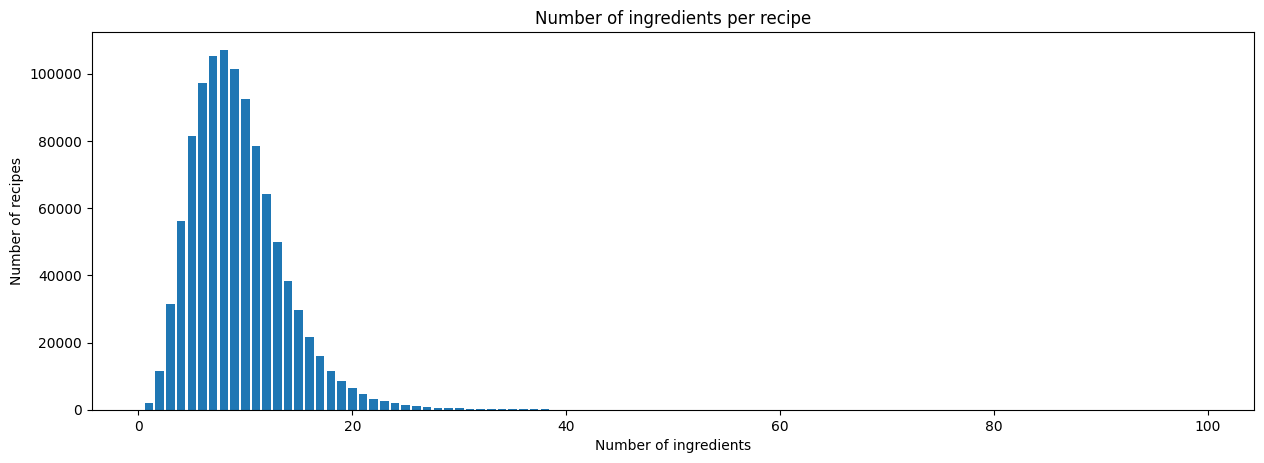

In [ ]:
plt.figure(figsize=(15,5), dpi=100)
plt.title("Number of ingredients per recipe")
plt.xlabel("Number of ingredients")
plt.ylabel("Number of recipes")
plt.bar(ingredients_per_recipe.keys(), ingredients_per_recipe.values(), align='center')
plt.show()

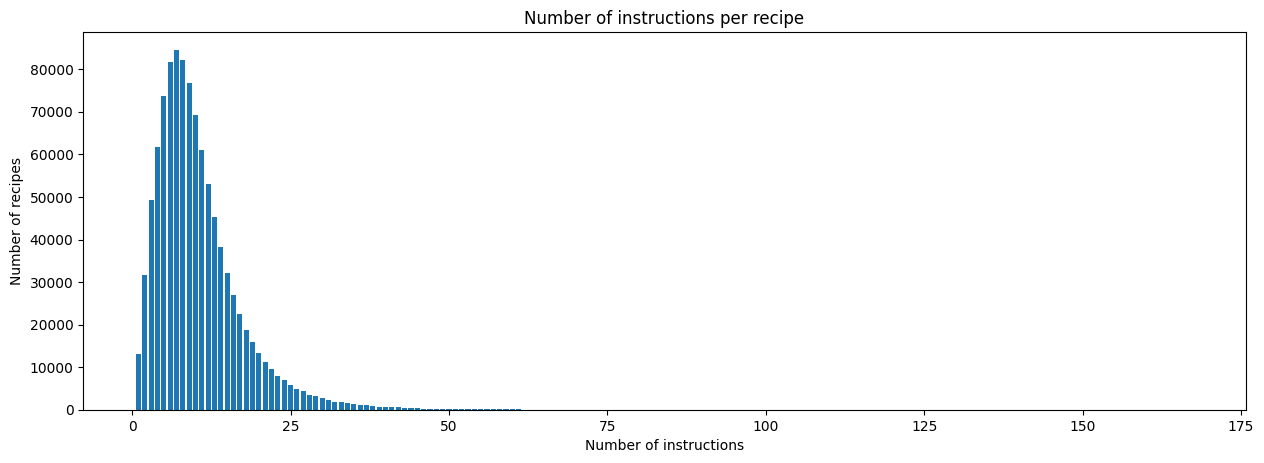

In [ ]:
plt.figure(figsize=(15,5), dpi=100)
plt.title("Number of instructions per recipe")
plt.xlabel("Number of instructions")
plt.ylabel("Number of recipes")
plt.bar(instructions_per_recipe.keys(), instructions_per_recipe.values(), align='center')
plt.show()

106995 recipes have 8 ingredients
84493 recipes have 7 instructions
Key: 17, percentage: 0.9562968573981276
Key: 23, percentage: 0.9518160276580041


<Figure size 3000x1000 with 0 Axes>

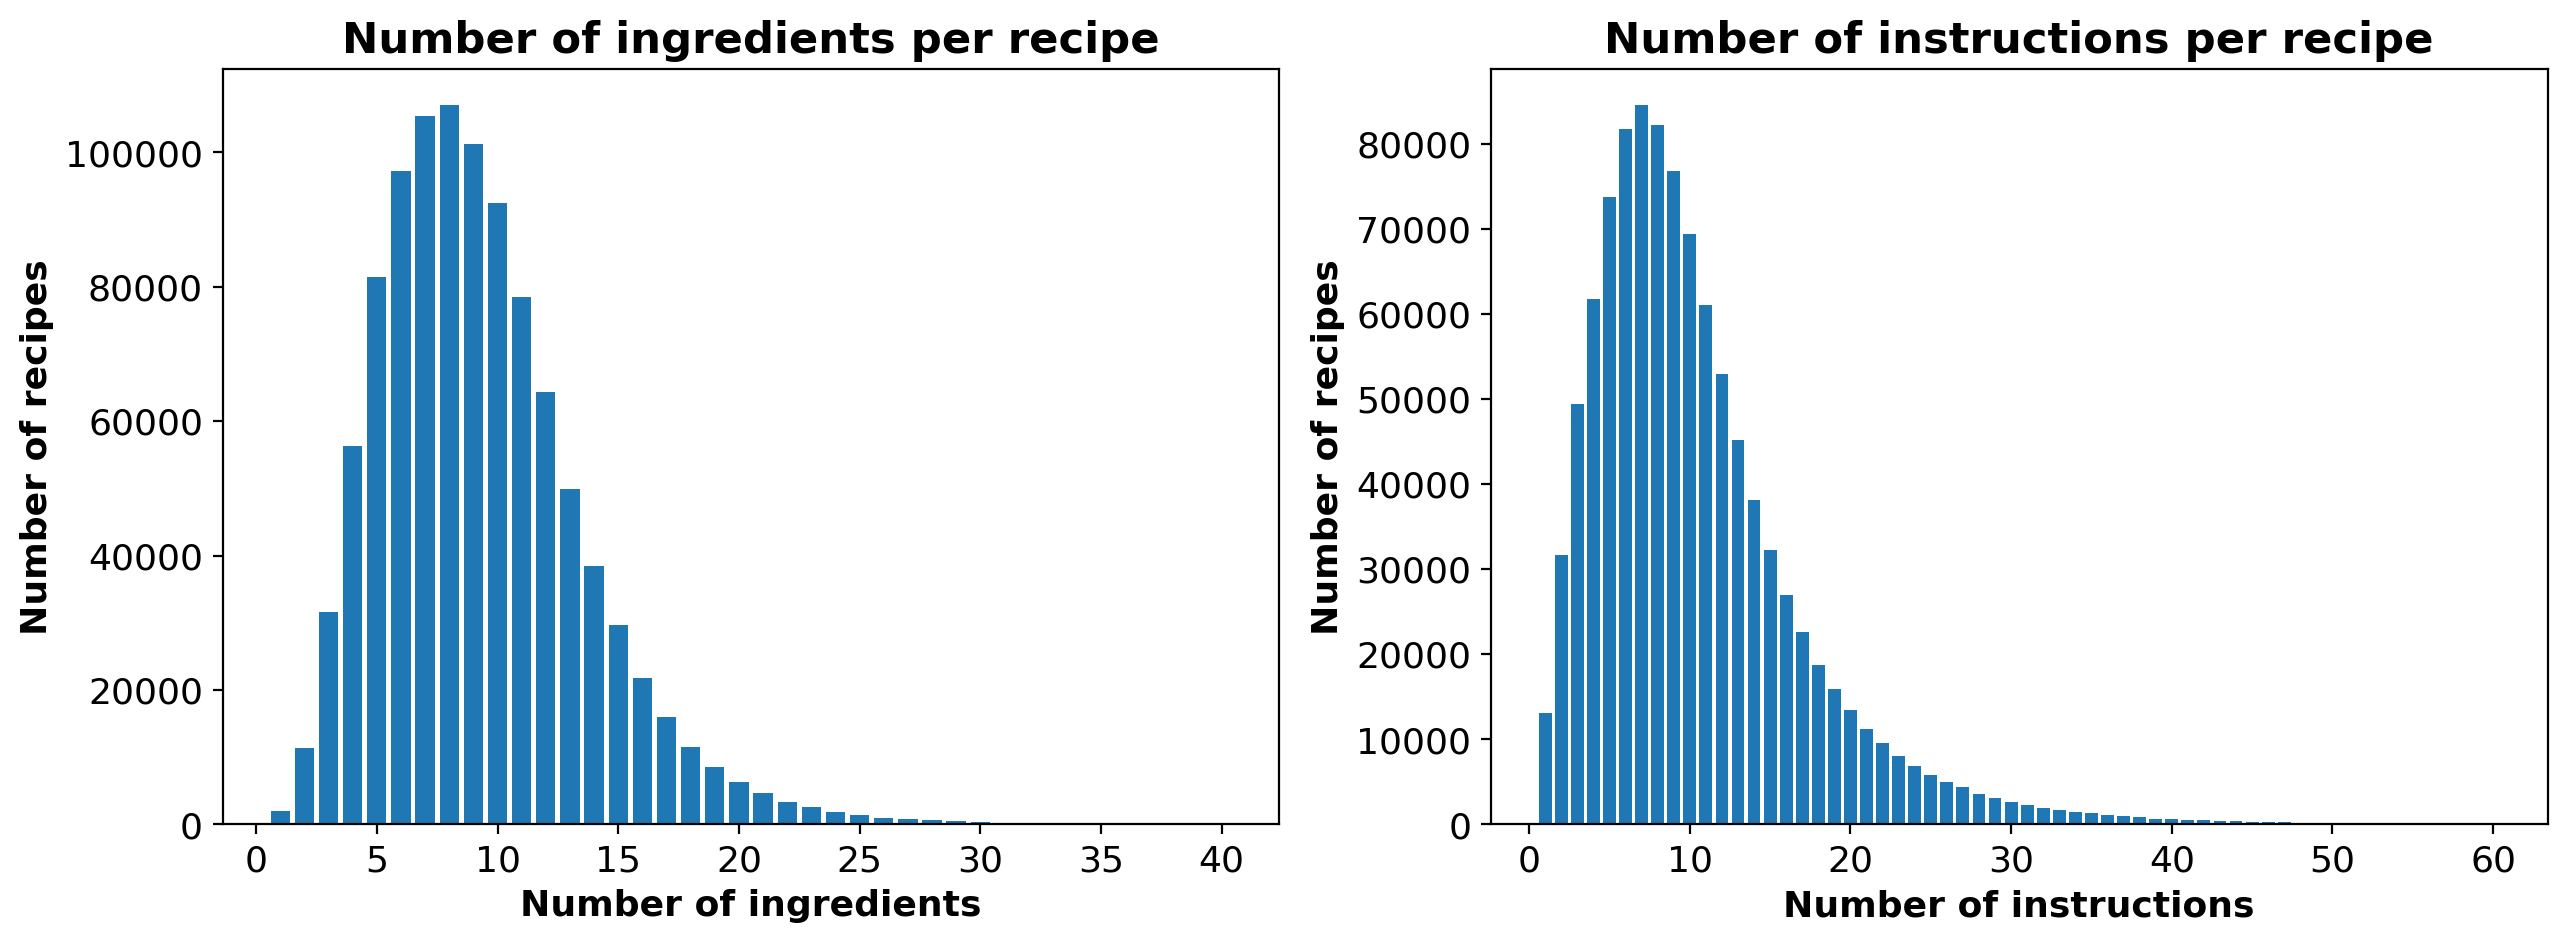

In [9]:
import collections
k = max(ingredients_per_recipe, key=ingredients_per_recipe.get)
print(f'{ingredients_per_recipe[k]} recipes have {k} ingredients')

k = max(instructions_per_recipe, key=instructions_per_recipe.get)
print(f'{instructions_per_recipe[k]} recipes have {k} instructions')

ings = 0
od = collections.OrderedDict(sorted(ingredients_per_recipe.items()))
for k, v in od.items():
    ings += v
    if ings >= 0.95 * num_recipes:
        print(f'Key: {k}, percentage: {ings/num_recipes}')
        break

inst = 0
od = collections.OrderedDict(sorted(instructions_per_recipe.items()))
for k, v in od.items():
    inst += v
    if inst >= 0.95 * num_recipes:
        print(f'Key: {k}, percentage: {inst/num_recipes}')
        break


# Subplots
ingredients_per_recipe_main = {k: v for k, v in ingredients_per_recipe.items() if k <= 40}
instructions_per_recipe_main = {k: v for k, v in instructions_per_recipe.items() if k <= 60}

plt.figure(figsize=(15,5), dpi=200)
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,5), dpi=200)
ax1.set_title("Number of ingredients per recipe", fontweight='bold')
ax1.set_xlabel('Number of ingredients', fontdict=dict(weight='bold'))
ax1.set_ylabel('Number of recipes', fontdict=dict(weight='bold'))
ax1.bar(ingredients_per_recipe_main.keys(), ingredients_per_recipe_main.values())
ax2.set_title("Number of instructions per recipe", fontweight='bold')
ax2.set_xlabel('Number of instructions', fontdict=dict(weight='bold'))
ax2.set_ylabel('Number of recipes', fontdict=dict(weight='bold'))
ax2.bar(instructions_per_recipe_main.keys(), instructions_per_recipe_main.values())

fig.savefig('distribution.png', bbox_inches='tight')

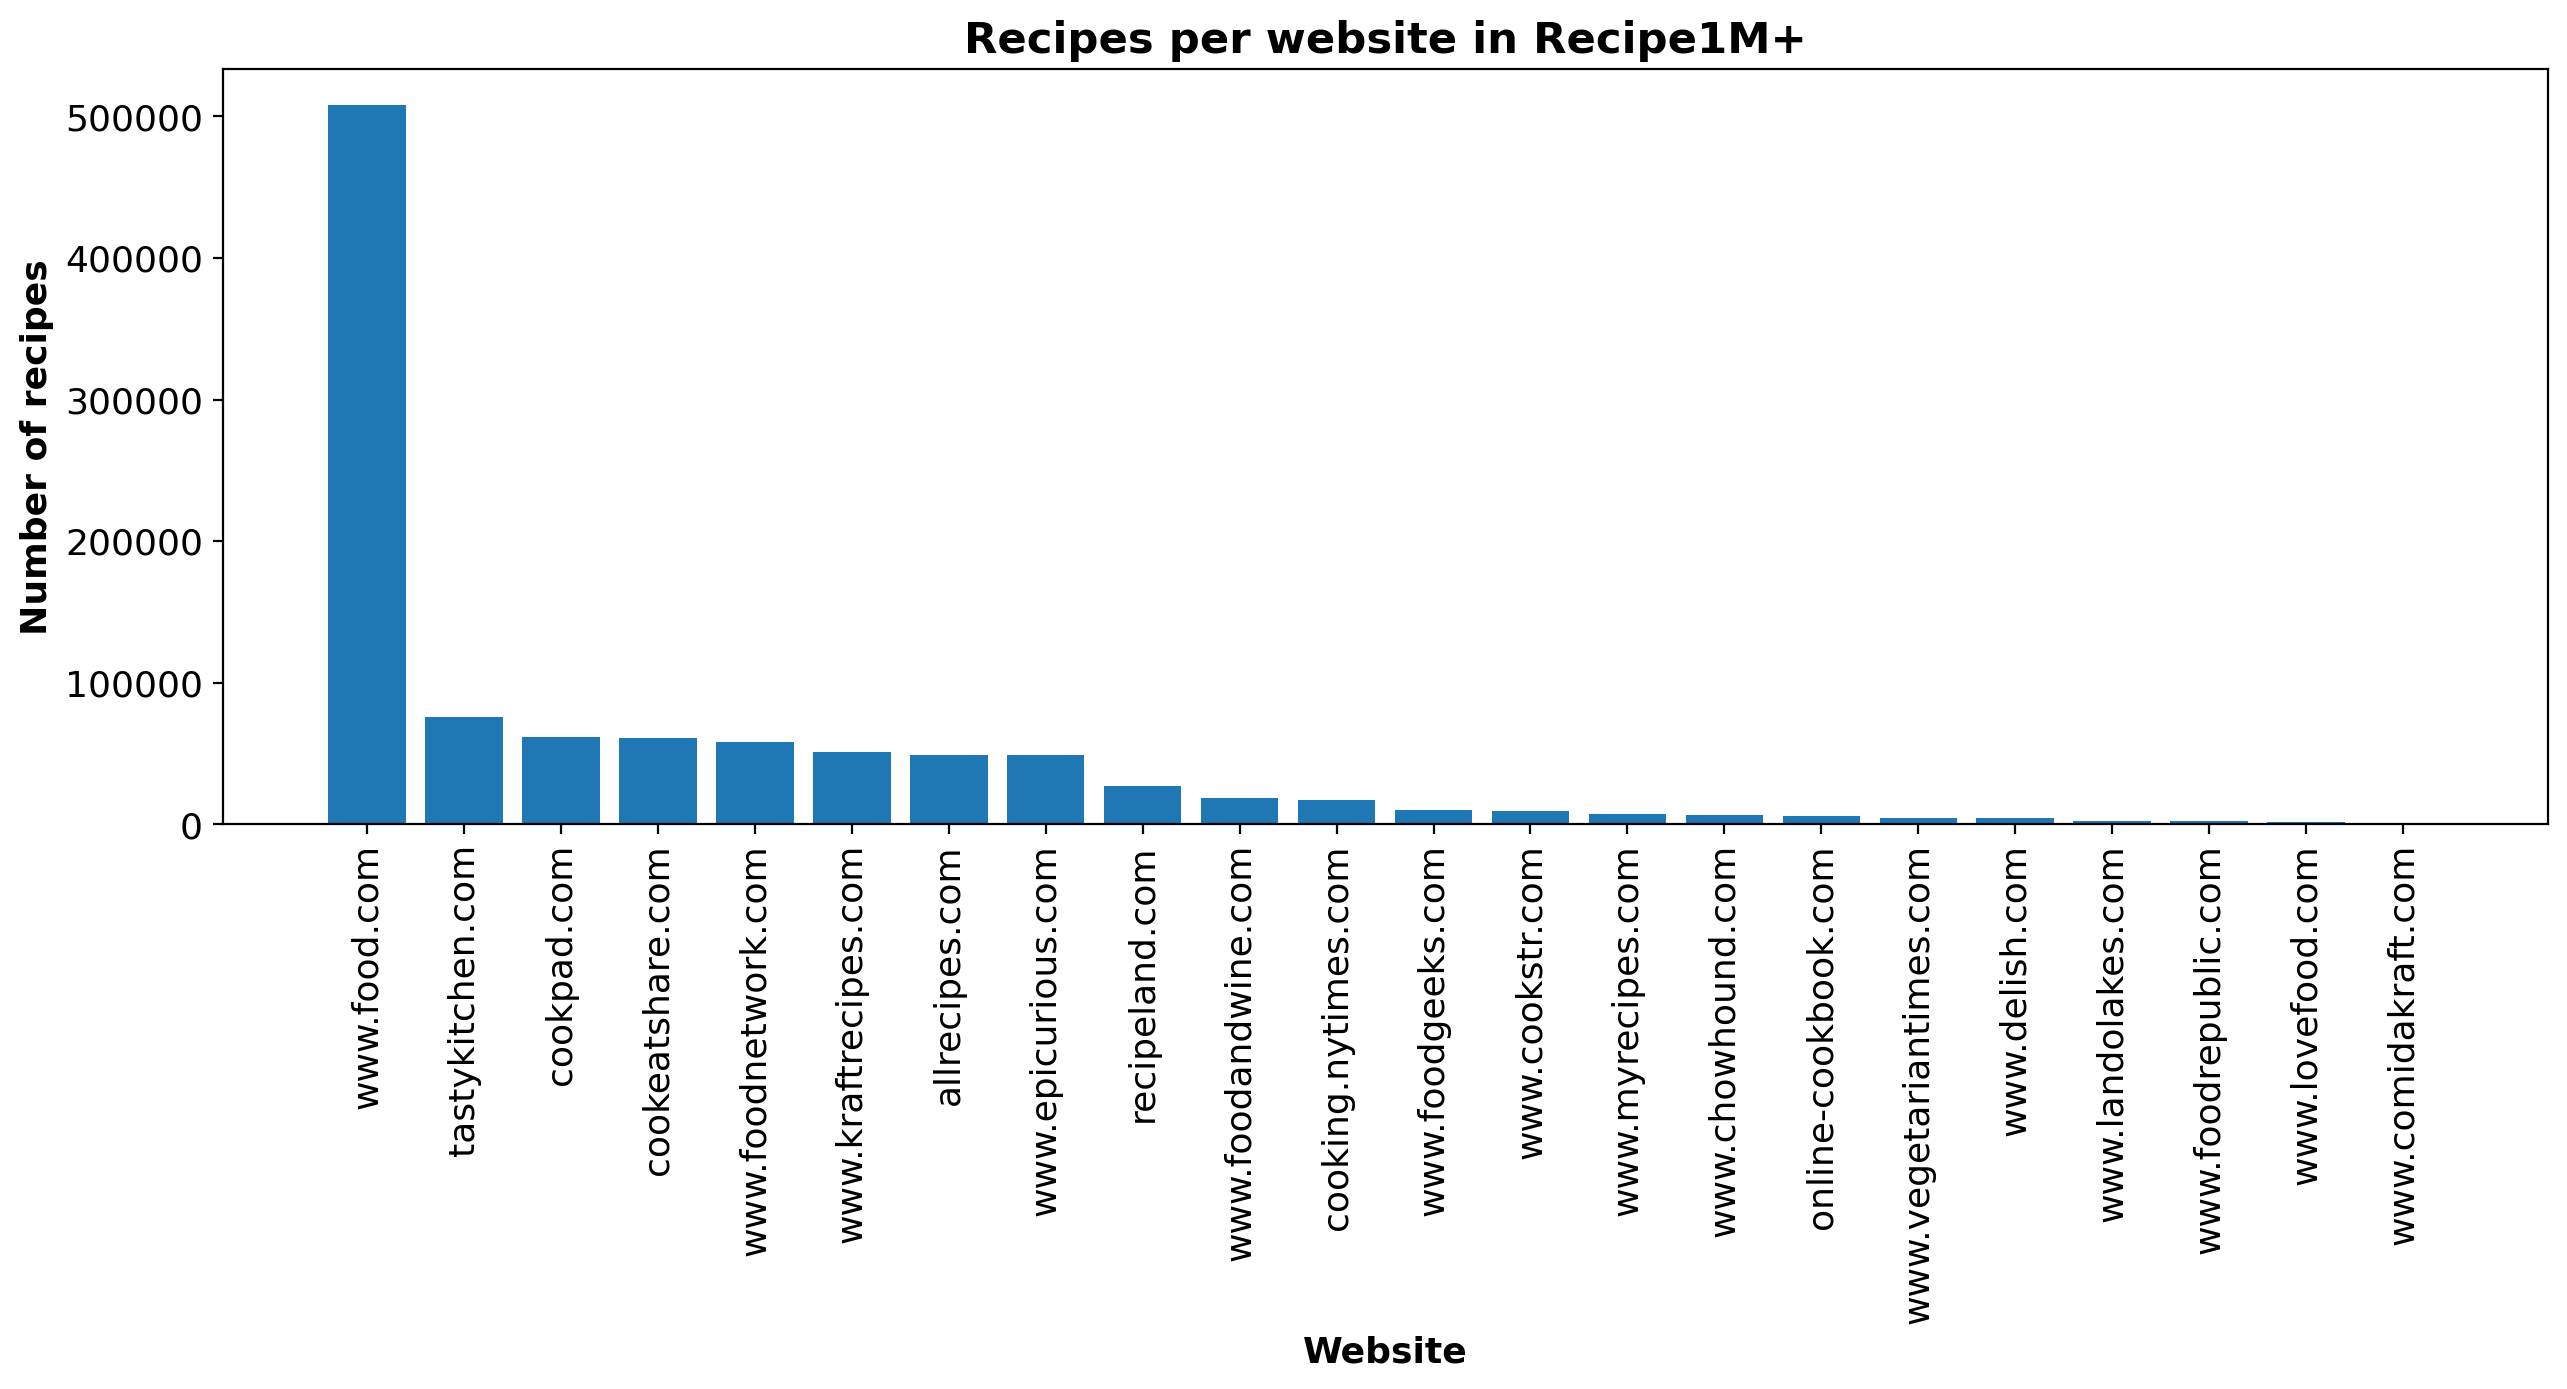

In [15]:
recipe_websites = dict(sorted(recipe_websites.items(), key=lambda item: item[1], reverse=True))
plt.figure(figsize=(15,5), dpi=200)
plt.title("Recipes per website in Recipe1M+", fontweight='bold')
plt.xlabel("Website", fontweight='bold')
plt.ylabel("Number of recipes", fontweight='bold')
plt.xticks(rotation='vertical')
plt.bar(recipe_websites.keys(), recipe_websites.values(), align='center')
plt.savefig('recipe1Mwebsites.png', bbox_inches='tight')
plt.show()

## Ingredients
### Including numeric category

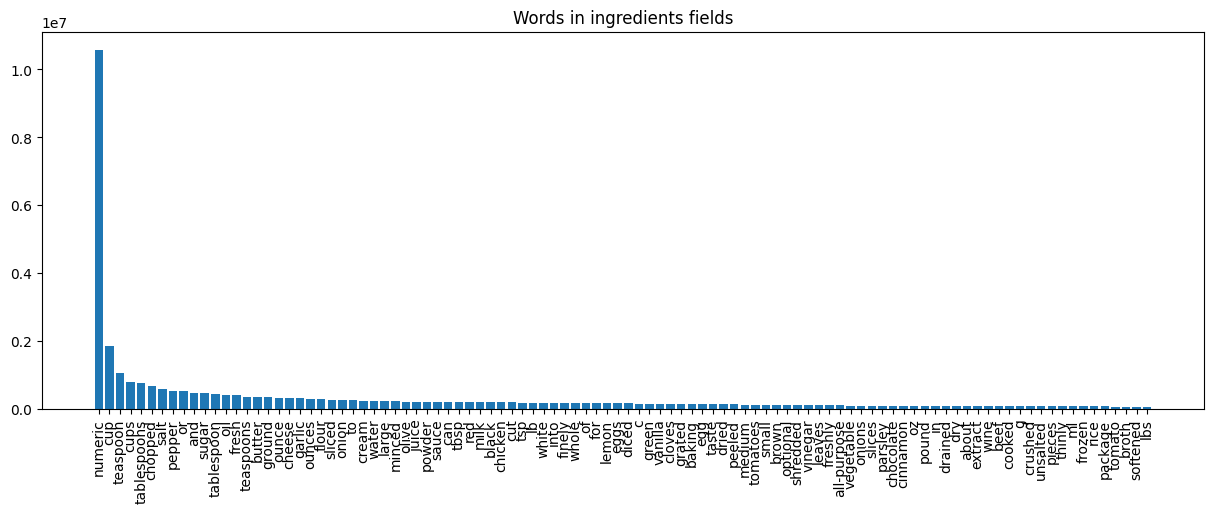

In [ ]:
# Plot for ingredients words
# Sort and strip to 100 most used
words_in_ingredients_stripped = sorted(words_in_ingredients.items(), key=lambda x:x[1], reverse=True)[:101]

ingredients_words, ingredients_words_amounts = zip(*words_in_ingredients_stripped)
ingredients_words = list(ingredients_words)
ingredients_words_amounts = list(ingredients_words_amounts)
# Plot
plt.figure(figsize=(15,5), dpi=100)
plt.title("Words in ingredients fields")
plt.bar(ingredients_words[:100], ingredients_words_amounts[:100], align='center')
plt.xticks(rotation='vertical')
plt.show()

### Excluding numeric category

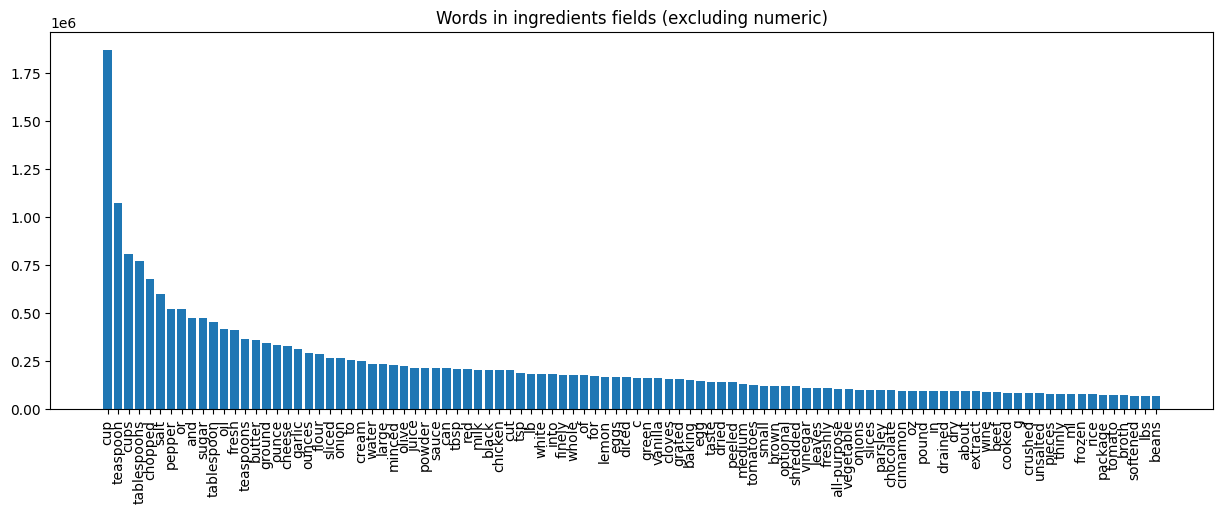

In [ ]:
i = ingredients_words.index('numeric')
del ingredients_words[i]
del ingredients_words_amounts[i]

# Plot
plt.figure(figsize=(15,5), dpi=100)
plt.title("Words in ingredients fields (excluding numeric)")
plt.bar(ingredients_words, ingredients_words_amounts, align='center')
plt.xticks(rotation='vertical')
plt.show()

### Nouns only

In [ ]:
# plt.figure(figsize=(15,5), dpi=100)
# plt.title("Number of ingredients nouns per recipe")
# plt.xlabel("Number of ingredients")
# plt.ylabel("Number of recipes")
# plt.xticks(rotation='vertical')
# plt.bar(nouns_in_ingredients.keys(), nouns_in_ingredients.values(), align='center')
# plt.show()

## Ingredients
### Including numeric category

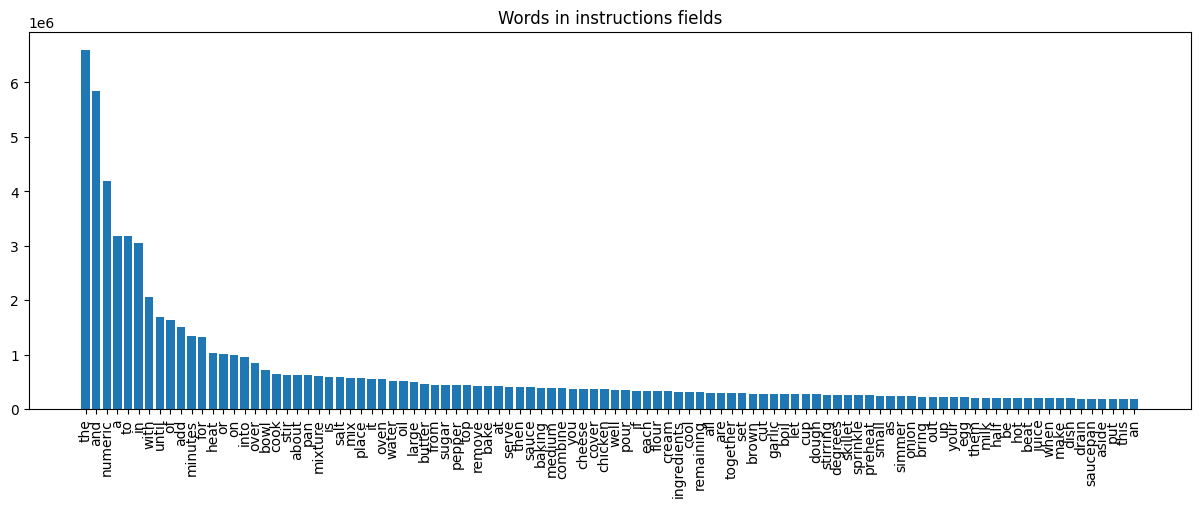

In [ ]:
# Plot for instructions words
# Sort and strip to 100 most used
words_in_instructions_stripped = sorted(words_in_instructions.items(), key=lambda x:x[1], reverse=True)[:101]

instructions_words, instructions_words_amounts = zip(*words_in_instructions_stripped)
instructions_words = list(instructions_words)
instructions_words_amounts = list(instructions_words_amounts)

# Plot
plt.figure(figsize=(15,5), dpi=100)
plt.title("Words in instructions fields")
plt.bar(instructions_words[:100], instructions_words_amounts[:100], align='center')
plt.xticks(rotation='vertical')
plt.show()

### Excluding numeric category

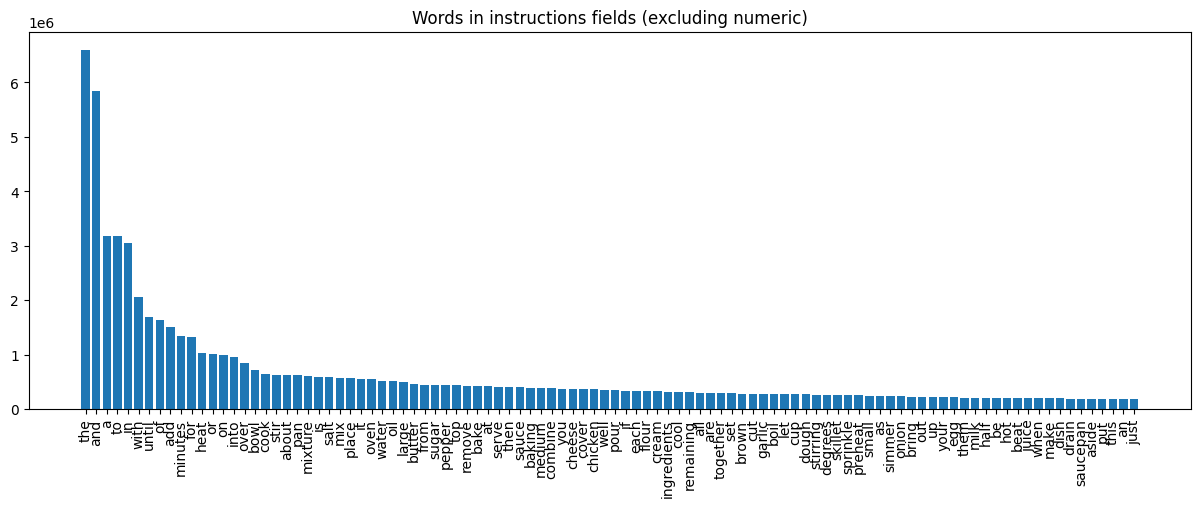

In [ ]:
i = instructions_words.index('numeric')
del instructions_words[i]
del instructions_words_amounts[i]

# Plot
plt.figure(figsize=(15,5), dpi=100)
plt.title("Words in instructions fields (excluding numeric)")
plt.bar(instructions_words, instructions_words_amounts, align='center')
plt.xticks(rotation='vertical')
plt.show()